## Scraping Data from a Formula 1 website and EDA
### 1. Web Scraping

In [97]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
url = 'https://www.formula1.com/en/results/2024/drivers'
response = requests.get(url) 
## Nhờ lib request send đến url và đông thời trả kq qua biến response

In [47]:
response

<Response [200]>

In [106]:
# response.content ## Source code

In [49]:
if response.status_code ==200:
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', class_='f1-table f1-table-with-data w-full')
    #Extract the rows of the table
    rows =table.find_all('tr')

    for row_id, row in enumerate(rows):
        columns = row.find_all('td')
        #print (f"row={row_id}:{columns}")
        if columns:
            #position = columns[0].text.strip()
            #drive_name = columns[1].text.strip()
            #print(position, drive_name)
            print(columns)
            break


[<td class="p-normal whitespace-nowrap"><p class="f1-text font-titillium tracking-normal font-normal non-italic normal-case leading-none f1-text__micro text-fs-15px">1</p></td>, <td class="p-normal whitespace-nowrap"><p class="f1-text font-titillium tracking-normal font-normal non-italic normal-case leading-none f1-text__micro text-fs-15px"><a class="underline underline-offset-normal decoration-1 decoration-greyLight hover:decoration-brand-primary" href="drivers/MAXVER01/max-verstappen"><span class="max-desktop:hidden">Max</span> <span class="max-tablet:hidden">Verstappen</span><span class="tablet:hidden">VER</span></a></p></td>, <td class="p-normal whitespace-nowrap"><p class="f1-text font-titillium tracking-normal font-normal non-italic normal-case leading-none f1-text__micro text-fs-15px">NED</p></td>, <td class="p-normal whitespace-nowrap"><p class="f1-text font-titillium tracking-normal font-normal non-italic normal-case leading-none f1-text__micro text-fs-15px"><a class="underlin

In [50]:
soup.title.text

'2024 DRIVER STANDINGS'

In [51]:
df = pd.DataFrame(columns=["Position","Drive_name","Nationality","Car","Point"])
for row_id, row in enumerate(rows):
    columns = row.find_all('td')
    #print (f"row={row_id}:{columns}")
    if columns:
        position = columns[0].text
        drive_name = columns[1].text.replace ("VER", '')

        nationality = columns[2].text
        car = columns[3].text
        pts = columns[4].text
        
        length = len(df)
        df.loc[length] = [position, drive_name, nationality, car, pts]
        # print(f"Position : {position}\
        #       \nDrive_name : {drive_name}\
        #       \nNationality : {nationality}\
        #       \nCar : {car}\
        #       \nPoint : {pts}\n\n")
print(df)

   Position           Drive_name Nationality                           Car  \
0         1       Max Verstappen         NED    Red Bull Racing Honda RBPT   
1         2      Lando NorrisNOR         GBR              McLaren Mercedes   
2         3   Charles LeclercLEC         MON                       Ferrari   
3         4     Oscar PiastriPIA         AUS              McLaren Mercedes   
4         5      Carlos SainzSAI         ESP                       Ferrari   
5         6    Lewis HamiltonHAM         GBR                      Mercedes   
6         7      Sergio PerezPER         MEX    Red Bull Racing Honda RBPT   
7         8    George RussellRUS         GBR                      Mercedes   
8         9   Fernando AlonsoALO         ESP  Aston Martin Aramco Mercedes   
9        10      Lance StrollSTR         CAN  Aston Martin Aramco Mercedes   
10       11   Nico HulkenbergHUL         GER                  Haas Ferrari   
11       12      Yuki TsunodaTSU         JPN                 RB 

In [52]:
df.to_csv(r'C:\Users\USER\f1_crawling\2024 Driver Standings.csv', index =False)

### 2.EDA

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Position     21 non-null     object
 1   Drive_name   21 non-null     object
 2   Nationality  21 non-null     object
 3   Car          21 non-null     object
 4   Point        21 non-null     object
dtypes: object(5)
memory usage: 1008.0+ bytes


In [54]:
df["Point"]=df["Point"].astype(float)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Position     21 non-null     object 
 1   Drive_name   21 non-null     object 
 2   Nationality  21 non-null     object 
 3   Car          21 non-null     object 
 4   Point        21 non-null     float64
dtypes: float64(1), object(4)
memory usage: 1008.0+ bytes


In [56]:
df.describe()

,Point
count,21.000000
mean,73.047619
std,85.755744
min,0.000000
25%,5.000000
50%,22.000000
75%,150.000000
max,277.000000


 ### 1. Country with the Most Drivers in the Top 20

In [73]:
df_topna = df.groupby('Nationality').count().reset_index() # After using groupby, the resulting Df might not have 'Nationality' as a column.So have to reset_index
# Sort by 'Point' in descending order
df_sorted = df_topna.sort_values(by='Drive_name', ascending=False)
df_sorted

,Nationality,Position,Drive_name,Car,Point
7,GBR,4,4,4,4
6,FRA,2,2,2,2
0,AUS,2,2,2,2
4,ESP,2,2,2,2
2,CHN,1,1,1,1
3,DEN,1,1,1,1
1,CAN,1,1,1,1
5,FIN,1,1,1,1
8,GER,1,1,1,1
9,JPN,1,1,1,1


* **Observation**: The United Kingdom (GBR) has the highest representation, with 4 drivers in the top 20 of F1 2024.

* **Comparison**: According to historical data, the UK is known for producing the most F1 drivers (163 in total according to Wikipedia). This trend continues in 2024

#### Here is the barchart of Top 4 Nationalities with the most drivers in the top 20

<Figure size 1000x600 with 0 Axes>

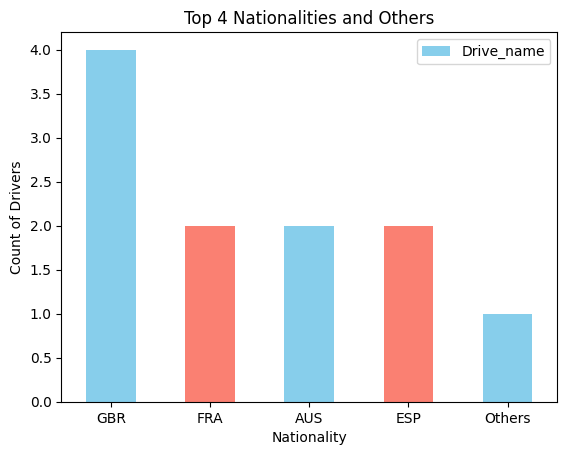

In [74]:
# Select top 4 and combine the rest into 'Others'
top_4 = df_sorted.head(4)
others = pd.DataFrame({'Nationality': ['Others'], 'Drive_name': [1]})
# Combine top 4 with 'Others'
df_combined = pd.concat([top_4, others])

# Plot
plt.figure(figsize=(10, 6))
ax = df_combined.plot.bar(x='Nationality', y='Drive_name', rot=0, color=['skyblue', 'salmon'])
ax.set_xlabel('Nationality')
ax.set_ylabel('Count of Drivers')
ax.set_title('Top 4 Nationalities and Others')
plt.show()

**Follow-up**: France, Australia, and Spain each have 2 drivers in the top 20, showcasing strong competition from these nations.

### 2. Most Popular Engine in F1 2024

* **Historical Context**: Ferrari was awarded the International Engine of the Year (IEOTY) in 2019, raising the question of whether it remains the most popular and successful engine in 2024.

In [86]:
# Group by accorrding to big engine
def classify_engine(car):
    if 'Ferrari' in car:
        return 'Ferrari'
    elif 'Honda' in car:
        return 'Honda'
    elif 'Mercedes' in car:
        return 'Mercedes'
    else: 
        return 'Renault'

# Add new column 'Engine'
df['Engine'] = df['Car'].apply(classify_engine)

In [87]:
# Group by 'Engine' and sum point
df_grouped_engine = df.groupby('Engine')['Point'].sum().reset_index()
df_grouped_engine = df_grouped_engine.sort_values(by='Point', ascending=False)


print("Total point by Engine:")
print(df_grouped_engine)

Total point by Engine:
     Engine  Point
2  Mercedes  709.0
1     Honda  442.0
0   Ferrari  372.0
3   Renault   11.0


In [105]:
df_count_engine = df.groupby('Engine')['Car'].count().reset_index()
print(df_count_engine)

     Engine  Car
0   Ferrari    7
1     Honda    4
2  Mercedes    8
3   Renault    2


In [94]:
df_engine_popular = pd.merge(df_count_engine,df_grouped_engine,on ='Engine')
df_engine_popular

,Engine,Car,Point
0,Ferrari,7,372.0
1,Honda,4,442.0
2,Mercedes,8,709.0
3,Renault,2,11.0


* **Current Findings**: In the 2024 season, Ferrari engines powered 7 cars in the top 20. However, the most popular engine by total points is Mercedes, with a total of 709 points.
* **Interesting Insight**: Despite Ferrari’s past accolades, Renault, often considered less dominant, has surprisingly secured the top 1 position in points, indicating potential growth in its adoption by drivers in future seasons.

In [102]:
import numpy as np

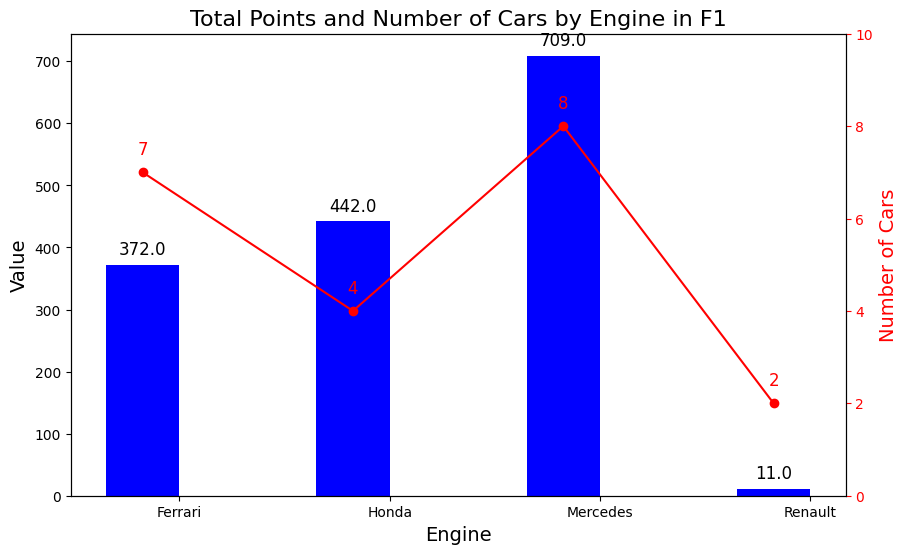

In [104]:
#Plot 
bar_width = 0.35
index = np.arange(len(df_engine_popular['Engine']))

# Create the bar plot for Points and Cars
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, df_engine_popular['Point'], bar_width, label='Total Points', color='b')
# bar2 = ax.bar(index + bar_width, df_engine_popular['Car'], bar_width, label='Number of Cars', color='g')

# right side ticks
ax2 = ax.twinx()
ax2.tick_params("y", colors = "r")
ax2.set_ylabel("Number of Cars", fontsize=14, color='r')
ax2.set_ylim(0,10)

# Plot Car data on the secondary y-axis as a line plot
ax2.plot(index, df_engine_popular['Car'], color='r', marker='o', linestyle='-', label='Number of Cars')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Engine', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.set_title('Total Points and Number of Cars by Engine in F1', fontsize=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_engine_popular['Engine'])

rects = ax.patches
for rect, label in zip(rects, df_engine_popular['Point']):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 10, round(label, 1), ha="center", va="bottom", fontsize=12)

for i, (x, y) in enumerate(zip(index, df_engine_popular['Car'])):
    ax2.text(x, y + 0.3, str(y), color='r', ha="center", va="bottom", fontsize=12)

# Display plot
plt.show()

### Summary:
* The UK continues to dominate in terms of the number of drivers in the top 20.
* Mercedes has proven to be the most effective engine in terms of points, while Renault's unexpected top performance could signal a shift in engine preferences in the future.

This analysis combines historical context with current data to provide a more comprehensive view of trends in F1 2024.